In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

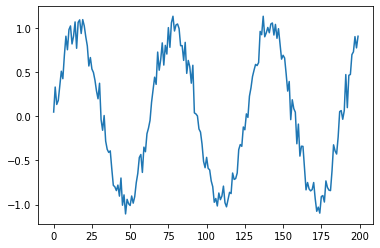

In [29]:
series = np.sin(0.1*np.arange(200)) +np.random.randn(200)*0.1 #noise 
plt.plot(series)


In [30]:
T = 20
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:",X.shape,"Y.shape:",Y.shape)

X.shape: (180, 20) Y.shape: (180,)


In [0]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)
r = model.fit(X[:-N//2],Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs= 80)

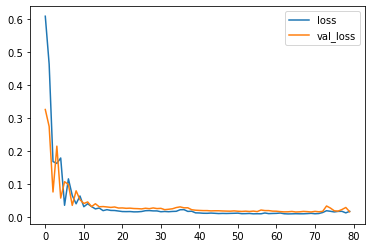

In [32]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
#wrong prediction model
validation_target = Y[-N//2:]
validation_prediction = []
i = -N//2
while len(validation_prediction)< len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i +=1

  validation_prediction.append(p)
  

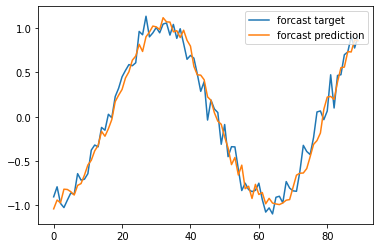

In [34]:
plt.plot(validation_target, label='forcast target')
plt.plot(validation_prediction, label='forcast prediction')
plt.legend()

In [0]:
#correct prediction
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction)< len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

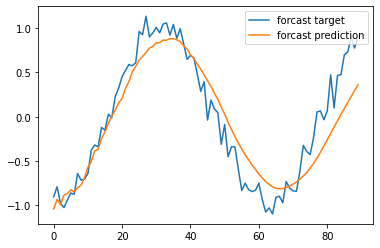

In [36]:
plt.plot(validation_target, label='forcast target')
plt.plot(validation_prediction, label='forcast prediction')
plt.legend()